In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as spst
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

import arviz as az
from cmdstanpy import cmdstan_path, CmdStanModel


In [2]:
df = pd.read_csv("./dati_polveri/polveri_emilia_PM10.csv")
df.head()

,02000003_005_202007.csv,COD_STAZ,ID_PARAM,DATA_INIZIO,DATA_FINE,VALORE,UM,Anno,Mese,Giorno,...,Mesenome,Stazione,COMUNE,INDIRIZZO,PROVINCIA,Altezza,PARAMETRO,TipoStazione,TipoArea,Zonizzazione
0,02000003_005_202007.txt,2000003,5,43831,43832,52,ug/m3,2020,1,1,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
1,02000003_005_202007.txt,2000003,5,43832,43833,59,ug/m3,2020,1,2,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
2,02000003_005_202007.txt,2000003,5,43833,43834,45,ug/m3,2020,1,3,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
3,02000003_005_202007.txt,2000003,5,43834,43835,42,ug/m3,2020,1,4,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
4,02000003_005_202007.txt,2000003,5,43835,43836,31,ug/m3,2020,1,5,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest


In [3]:
def string_date(anno,mese,giorno):
    return str(anno)+"-"+str(mese).zfill(2)+"-"+str(giorno).zfill(2)

In [4]:
#res = df[(df['Stazione']=='MARECCHIA')]
res = df[df['Anno'] == 2018].copy()
aux_df = res[['Anno','Mese', 'Giorno', 'Stazione', 'VALORE']].copy()
aux_df['VALORE'].replace(to_replace=0, value=1, inplace=True)
lista_date = aux_df.apply(lambda vec : string_date(vec[0],vec[1],vec[2]),axis=1).tolist()
lista_log = aux_df.apply(lambda vec : np.log(vec[4]),axis=1).tolist()

final_df = res[['Stazione','VALORE','TipoStazione','TipoArea','Zonizzazione','Altezza','Mese']].copy()
final_df['Date'] = lista_date
final_df['LogVal'] = lista_log

final_df['Mese'].replace(to_replace=1, value='Gennaio', inplace=True)
final_df['Mese'].replace(to_replace=2, value='Febbraio', inplace=True)
final_df['Mese'].replace(to_replace=3, value='Marzo', inplace=True)
final_df['Mese'].replace(to_replace=4, value='Aprile', inplace=True)
final_df['Mese'].replace(to_replace=5, value='Maggio', inplace=True)
final_df['Mese'].replace(to_replace=6, value='Giugno', inplace=True)
final_df['Mese'].replace(to_replace=7, value='Luglio', inplace=True)
final_df['Mese'].replace(to_replace=8, value='Agosto', inplace=True)
final_df['Mese'].replace(to_replace=9, value='Settembre', inplace=True)
final_df['Mese'].replace(to_replace=10, value='Ottobre', inplace=True)
final_df['Mese'].replace(to_replace=11, value='Novembre', inplace=True)
final_df['Mese'].replace(to_replace=12, value='Dicembre', inplace=True)


final_df = final_df.sort_values(by=['Stazione','Date'])
final_df.head()

,Stazione,VALORE,TipoStazione,TipoArea,Zonizzazione,Altezza,Mese,Date,LogVal
75727,BADIA,39,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-01,3.663562
75728,BADIA,13,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-02,2.564949
75729,BADIA,12,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-03,2.484907
75730,BADIA,15,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-04,2.708050
75731,BADIA,34,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-05,3.526361


In [5]:
stazioni_df = final_df.copy()
stazioni_df = stazioni_df.sort_values(by=['Stazione'])
## Ordine: alfabetico
stazioni_df = stazioni_df[['Stazione']]
stazioni_df.drop_duplicates(inplace=True)
stazioni_df = stazioni_df.reset_index()
stazioni_df = stazioni_df[['Stazione']]
lista_stazioni = stazioni_df['Stazione'].tolist()

In [6]:
lista_mediane_stazioni = []
for stazione in lista_stazioni:
    aux_df = final_df[final_df['Stazione'] == stazione]
    aux_df = aux_df[['LogVal']]
    logvalori = aux_df.to_numpy()
    lista_mediane_stazioni.append(np.median(logvalori))
    
    
print(lista_mediane_stazioni)

[2.8903717578961645, 3.1354942159291497, 3.2188758248682006, 3.1354942159291497, 3.091042453358316, 2.1972245773362196, 3.2188758248682006, 3.1780538303479458, 3.332204510175204, 2.302585092994046, 2.995732273553991, 3.1354942159291497, 2.302585092994046, 3.295836866004329, 3.044522437723423, 3.091042453358316, 3.4011973816621555, 3.1354942159291497, 3.332204510175204, 2.9444389791664403, 3.258096538021482, 3.2188758248682006, 3.044522437723423, 3.295836866004329, 2.995732273553991, 3.332204510175204, 3.2188758248682006, 2.995732273553991, 3.091042453358316, 3.1780538303479458, 3.1780538303479458, 2.9700856263602153, 3.1354942159291497, 3.2188758248682006, 3.091042453358316, 3.258096538021482, 3.295836866004329, 3.367295829986474, 3.044522437723423, 2.70805020110221, 3.044522437723423, 3.2188758248682006, 3.044522437723423, 2.3978952727983707, 3.4657359027997265, 2.833213344056216, 3.044522437723423, 3.1354942159291497, 3.1354942159291497]


In [7]:
stazioni_df['Mediana'] = lista_mediane_stazioni
stazioni_df = stazioni_df.sort_values(by='Mediana')
stazioni_df.head()

,Stazione,Mediana
5,CASTELLUCCIO,2.197225
12,FEBBIO,2.302585
9,CORTE BRUGNATELLA,2.302585
43,SAVIGNANO DI RIGO,2.397895
39,SAN LEO,2.708050


In [8]:
lista_stazioni_ordinata_per_mediana = stazioni_df['Stazione'].tolist()
final_df['Cat_Stazione_Order_By_Median'] = pd.Categorical(final_df['Stazione'], lista_stazioni_ordinata_per_mediana)
sorted_final_df = final_df.sort_values(by='Cat_Stazione_Order_By_Median')

In [9]:
#res = df[(df['Stazione']=='MARECCHIA')]
res = df[df['Anno'] == 2018].copy()
aux_df = res[['Anno','Mese', 'Giorno', 'Stazione', 'VALORE']].copy()

lista_date = aux_df.apply(lambda vec : string_date(vec[0],vec[1],vec[2]),axis=1).tolist()

final_df = res[['Stazione','VALORE','TipoStazione','TipoArea','Zonizzazione','Altezza','Mese']].copy()
final_df['Date'] = lista_date

final_df['Mese'].replace(to_replace=1, value='Gennaio', inplace=True)
final_df['Mese'].replace(to_replace=2, value='Febbraio', inplace=True)
final_df['Mese'].replace(to_replace=3, value='Marzo', inplace=True)
final_df['Mese'].replace(to_replace=4, value='Aprile', inplace=True)
final_df['Mese'].replace(to_replace=5, value='Maggio', inplace=True)
final_df['Mese'].replace(to_replace=6, value='Giugno', inplace=True)
final_df['Mese'].replace(to_replace=7, value='Luglio', inplace=True)
final_df['Mese'].replace(to_replace=8, value='Agosto', inplace=True)
final_df['Mese'].replace(to_replace=9, value='Settembre', inplace=True)
final_df['Mese'].replace(to_replace=10, value='Ottobre', inplace=True)
final_df['Mese'].replace(to_replace=11, value='Novembre', inplace=True)
final_df['Mese'].replace(to_replace=12, value='Dicembre', inplace=True)


final_df = final_df.sort_values(by=['Stazione','Date'])
final_df.head()

,Stazione,VALORE,TipoStazione,TipoArea,Zonizzazione,Altezza,Mese,Date
75727,BADIA,39,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-01
75728,BADIA,13,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-02
75729,BADIA,12,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-03
75730,BADIA,15,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-04
75731,BADIA,34,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-05


In [10]:
lista_stazioni_ordinata_per_mediana = stazioni_df['Stazione'].tolist()
final_df['Cat_Stazione_Order_By_Median'] = pd.Categorical(final_df['Stazione'], lista_stazioni_ordinata_per_mediana)
sorted_final_df = final_df.sort_values(by='Cat_Stazione_Order_By_Median')

In [11]:
date_list = [datetime.date(2018,1,1)]
for i in range(1,365):
    date_list.append(datetime.date(2018,1,1) + datetime.timedelta(days=i))
    
#df_with_stations_as_cols = pd.DataFrame()
#df_with_stations_as_cols['Date'] = date_list
#df_with_stations_as_cols.tail()

In [12]:
aux_df = final_df.copy()
aux_df = aux_df.sort_values(by=['Cat_Stazione_Order_By_Median'])
## Ordine: alfabetico
aux_df = aux_df[['Stazione']]
aux_df.drop_duplicates(inplace=True)
aux_df = aux_df.reset_index()
aux_df = aux_df[['Stazione']]

N_stazioni = aux_df.size

matrix_with_stations_as_cols = np.empty((365,N_stazioni))
matrix_with_stations_as_cols[:] = np.nan
print(matrix_with_stations_as_cols.shape)

(365, 49)


In [13]:
aux_df.head()

,Stazione
0,CASTELLUCCIO
1,FEBBIO
2,CORTE BRUGNATELLA
3,SAVIGNANO DI RIGO
4,SAN LEO


In [14]:
primo_giorno = datetime.date(2018,1,1)

for stazione_idx in range(N_stazioni):
    #print(stazione[0])
    stazione = aux_df.values.tolist()[stazione_idx]
    staz_internal = stazione[0]
    df_solo_stazione = final_df[final_df['Stazione'] == staz_internal]
    
    for val in df_solo_stazione.values.tolist():
        giorno = datetime.date.fromisoformat(val[7])   
        giorno_idx = (giorno - primo_giorno).days        
        matrix_with_stations_as_cols[giorno_idx,stazione_idx] = val[1]
            

In [15]:
matrix_with_stations_as_cols

array([[ 4.,  6., 10., ..., nan, 47., 62.],
       [ 3.,  3.,  4., ..., nan, 27., 40.],
       [ 0.,  5.,  5., ..., nan, 37., 36.],
       ...,
       [ 8., 12.,  4., ..., 39., 59., 56.],
       [ 7.,  6.,  5., ..., 32., 54., 57.],
       [nan, nan, nan, ..., nan, nan, nan]])

In [16]:
lista_stazioni = []
for val in aux_df.values.tolist():
    lista_stazioni.append(val[0])

df_with_stations_as_cols = pd.DataFrame(matrix_with_stations_as_cols, columns = lista_stazioni, index = date_list)

In [17]:
df_with_stations_as_cols

,CASTELLUCCIO,FEBBIO,CORTE BRUGNATELLA,SAVIGNANO DI RIGO,SAN LEO,VERUCCHIO,BADIA,GIARDINI MARGHERITA,PARCO RESISTENZA,PARCO BERTOZZI,...,S. LAZZARO,S. ROCCO,MALCANTONE,FLAMINIA,GIARDINI,MONTEBELLO,CITTADELLA,SAN FRANCESCO,GERBIDO,TIMAVO
2018-01-01,4.0,6.0,10.0,12.0,13.0,25.0,39.0,43.0,51.0,44.0,...,48.0,45.0,44.0,45.0,61.0,51.0,53.0,NaN,47.0,62.0
2018-01-02,3.0,3.0,4.0,3.0,7.0,12.0,13.0,18.0,28.0,22.0,...,22.0,25.0,26.0,36.0,26.0,35.0,25.0,NaN,27.0,40.0
2018-01-03,0.0,5.0,5.0,2.0,0.0,6.0,12.0,16.0,17.0,19.0,...,26.0,28.0,25.0,27.0,30.0,25.0,22.0,NaN,37.0,36.0
2018-01-04,0.0,2.0,3.0,5.0,5.0,21.0,15.0,23.0,39.0,37.0,...,34.0,35.0,30.0,NaN,42.0,37.0,29.0,36.0,38.0,37.0
2018-01-05,4.0,5.0,13.0,7.0,13.0,45.0,34.0,43.0,58.0,51.0,...,52.0,40.0,39.0,71.0,62.0,52.0,48.0,57.0,50.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,8.0,6.0,8.0,8.0,NaN,NaN,19.0,NaN,23.0,21.0,...,24.0,30.0,27.0,30.0,28.0,38.0,34.0,44.0,41.0,34.0
2018-12-28,5.0,6.0,6.0,7.0,NaN,NaN,16.0,NaN,39.0,36.0,...,44.0,48.0,43.0,52.0,59.0,50.0,45.0,33.0,57.0,57.0
2018-12-29,8.0,12.0,4.0,10.0,12.0,24.0,14.0,NaN,43.0,42.0,...,48.0,54.0,49.0,51.0,57.0,48.0,48.0,39.0,59.0,56.0
2018-12-30,7.0,6.0,5.0,11.0,16.0,33.0,19.0,NaN,52.0,48.0,...,49.0,66.0,58.0,60.0,64.0,51.0,51.0,32.0,54.0,57.0


In [18]:
df_with_stations_as_cols.fillna(0.0,inplace=True)
df_with_stations_as_cols.replace(to_replace=0.0, value=np.NaN, inplace=True)
df_with_stations_as_cols = df_with_stations_as_cols.apply(np.log10)

In [19]:
stazioni = df['Stazione'].fillna('CITTADELLA').unique().tolist()

In [20]:
dizionario = {}

for value in stazioni:
    dizionario[value] = az.from_netcdf(filename='./inference_data_211_with_nan//'+value+'.ncdf')

array([<AxesSubplot: title={'center': 'phi'}>,
       <AxesSubplot: title={'center': 'phi_2'}>,
       <AxesSubplot: title={'center': 'theta'}>,
       <AxesSubplot: title={'center': 'sigma'}>], dtype=object)

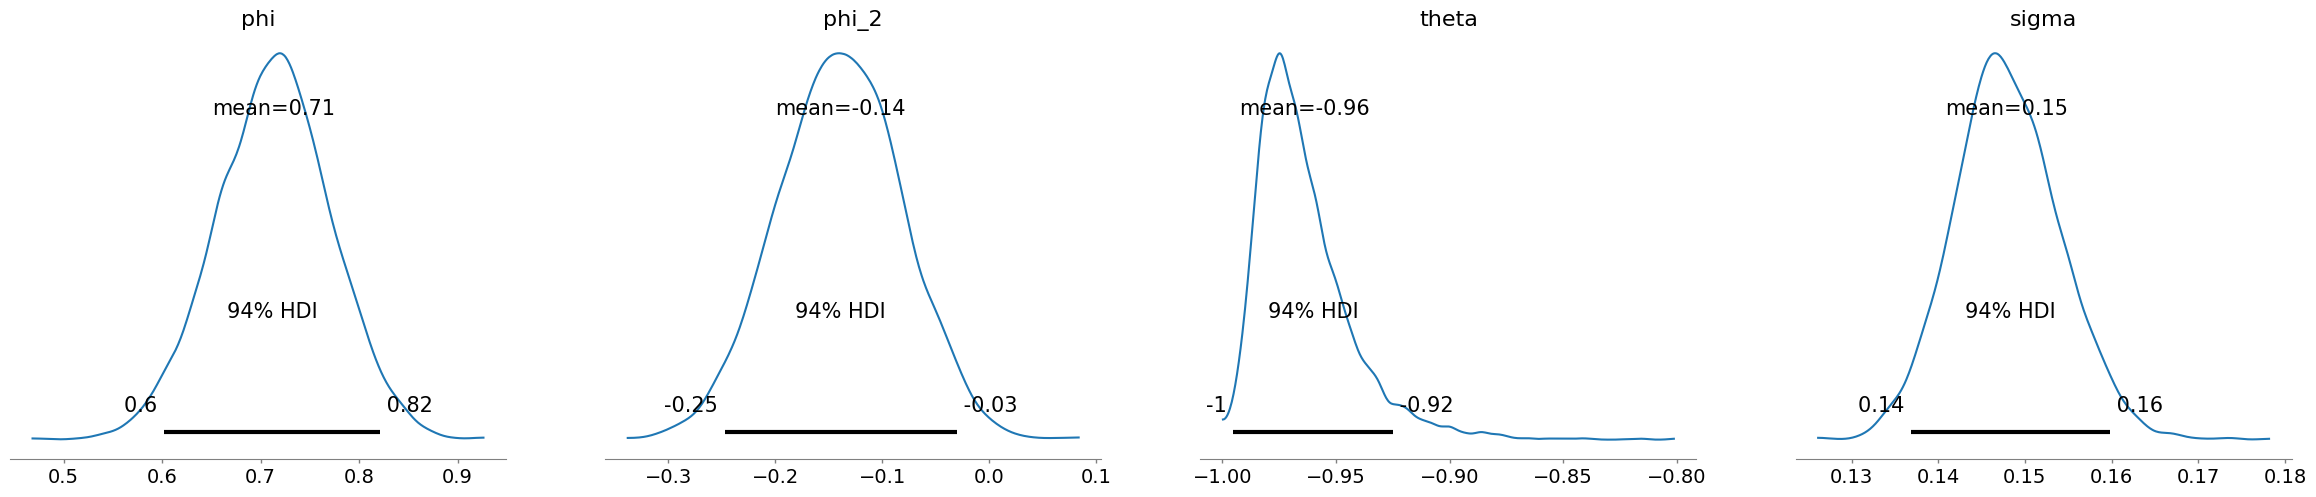

In [21]:
az.plot_posterior(dizionario['BESENZONE'],var_names=['phi','phi_2','theta','sigma'])

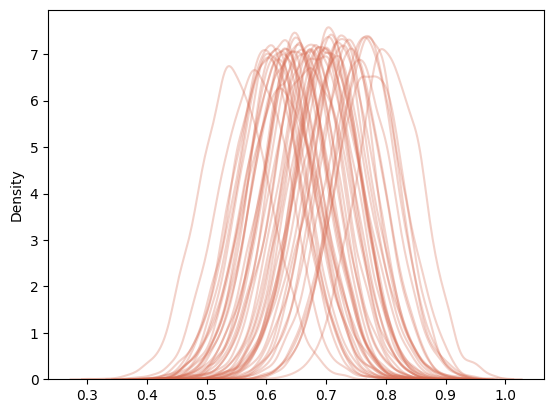

In [22]:
col_map = sns.dark_palette((20,90,65), input='husl', as_cmap=True)
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
col_map = truncate_colormap(col_map, minval=0.6)


ax = plt.subplot(1,1,1)
index = 0
for stazione in dizionario:
    sns.kdeplot(dizionario[stazione].posterior.phi.values.flatten())
    line = ax.get_lines()[-1]
    line.set_c(col_map(
        150
    ))
    line.set_alpha(0.3)
    index += 1
                

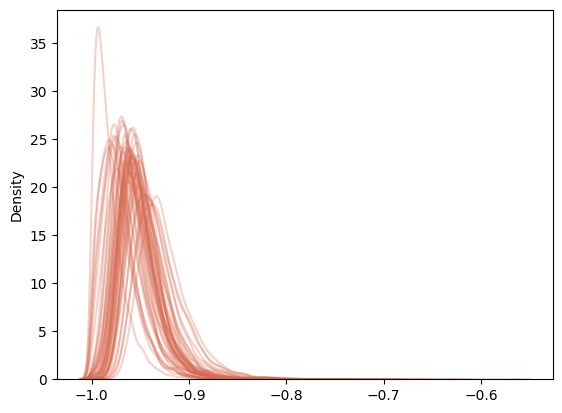

In [23]:
col_map = sns.dark_palette((20,90,65), input='husl', as_cmap=True)
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
col_map = truncate_colormap(col_map, minval=0.6)


ax = plt.subplot(1,1,1)
index = 0
for stazione in dizionario:
    sns.kdeplot(dizionario[stazione].posterior.theta.values.flatten())
    line = ax.get_lines()[-1]
    line.set_c(col_map(
        150
    ))
    line.set_alpha(0.3)
    index += 1
    


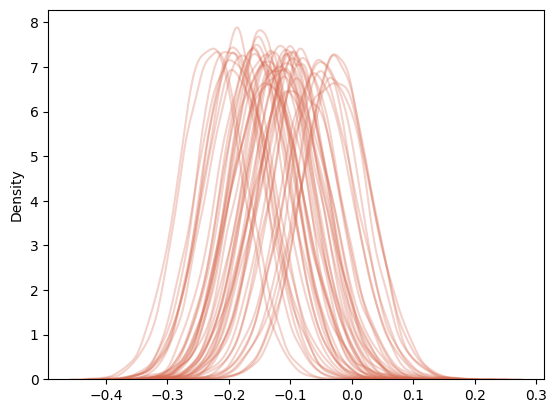

In [24]:
col_map = sns.dark_palette((20,90,65), input='husl', as_cmap=True)
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
col_map = truncate_colormap(col_map, minval=0.6)


ax = plt.subplot(1,1,1)
index = 0
for stazione in dizionario:
    sns.kdeplot(dizionario[stazione].posterior.phi_2.values.flatten())
    line = ax.get_lines()[-1]
    line.set_c(col_map(
        150
    ))
    line.set_alpha(0.3)
    index += 1
    

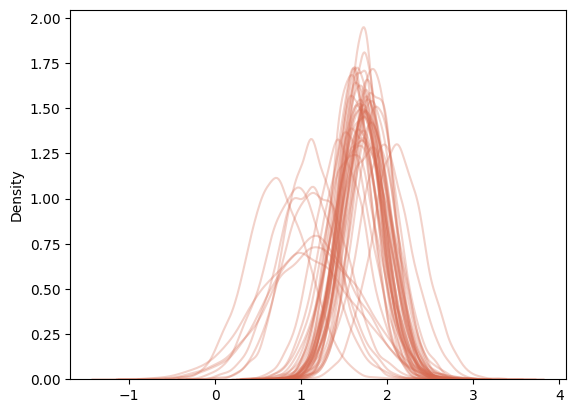

In [25]:
col_map = sns.dark_palette((20,90,65), input='husl', as_cmap=True)
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
col_map = truncate_colormap(col_map, minval=0.6)


ax = plt.subplot(1,1,1)
index = 0
for stazione in dizionario:
    sns.kdeplot(dizionario[stazione].posterior.y_start.values[:,:,2].flatten())
    line = ax.get_lines()[-1]
    line.set_c(col_map(
        150
    ))
    line.set_alpha(0.3)
    index += 1
                

In [26]:
az.hdi(dizionario['BESENZONE'],hdi_prob=0.95).phi_2.values
np.percentile(dizionario['BESENZONE'].posterior.phi_2.values.flatten(),2.5)

-0.25396615

In [27]:
risultati_phi2 = pd.DataFrame()

for stazione in dizionario:
    vec = az.hdi(dizionario[stazione],hdi_prob=0.95).phi_2.values
    risultati_phi2.loc[stazione,'HDI_95_left'] = vec[0]
    risultati_phi2.loc[stazione,'HDI_95_right'] = vec[1]
    risultati_phi2.loc[stazione,'Contains zero'] = (np.sign(vec[0]*vec[1])<=0)
    risultati_phi2.loc[stazione,'Mean'] = np.mean(dizionario[stazione].posterior.phi_2.values.flatten())
    risultati_phi2.loc[stazione,'Median'] = np.median(dizionario[stazione].posterior.phi_2.values.flatten())
    risultati_phi2.loc[stazione,'Standard deviation'] = np.std(dizionario[stazione].posterior.phi_2.values.flatten())
    risultati_phi2.loc[stazione,'25%'] = np.percentile(dizionario[stazione].posterior.phi_2.values.flatten(),25)
    risultati_phi2.loc[stazione,'75%'] = np.percentile(dizionario[stazione].posterior.phi_2.values.flatten(),75)
    risultati_phi2.loc[stazione,'IQR'] = np.percentile(dizionario[stazione].posterior.phi_2.values.flatten(),75) - np.percentile(dizionario[stazione].posterior.phi_2.values.flatten(),25)
    

risultati_phi2

,HDI_95_left,HDI_95_right,Contains zero,Mean,Median,Standard deviation,25%,75%,IQR
CITTADELLA,-0.266151,-0.057350,False,-0.156077,-0.155888,0.053581,-0.192147,-0.119757,0.072390
MONTEBELLO,-0.201444,0.011659,True,-0.094966,-0.095538,0.054086,-0.131454,-0.058933,0.072522
BADIA,-0.285551,-0.078629,False,-0.185767,-0.186243,0.053867,-0.222517,-0.148889,0.073628
SARAGAT,-0.216897,-0.015155,False,-0.114891,-0.115170,0.052143,-0.150591,-0.079565,0.071025
CASTELLARANO,-0.320967,-0.116462,False,-0.222832,-0.223058,0.052874,-0.259361,-0.187276,0.072085
S. LAZZARO,-0.243656,-0.036891,False,-0.147044,-0.148056,0.052740,-0.182784,-0.112295,0.070489
FEBBIO,-0.225011,-0.003404,False,-0.116318,-0.116395,0.056536,-0.153411,-0.079255,0.074156
S. ROCCO,-0.262234,-0.055283,False,-0.157183,-0.157819,0.052964,-0.193434,-0.121883,0.071551
TIMAVO,-0.287690,-0.079206,False,-0.179313,-0.179269,0.053507,-0.215970,-0.142870,0.073100
GIARDINI,-0.234362,-0.024618,False,-0.125872,-0.126517,0.054654,-0.161949,-0.089702,0.072246


In [28]:
risultati_phi = pd.DataFrame()

for stazione in dizionario:
    vec = az.hdi(dizionario[stazione],hdi_prob=0.95).phi.values
    risultati_phi.loc[stazione,'HDI_95_left'] = vec[0]
    risultati_phi.loc[stazione,'HDI_95_right'] = vec[1]
    risultati_phi.loc[stazione,'Contains zero'] = (np.sign(vec[0]*vec[1])<=0)
    risultati_phi.loc[stazione,'Mean'] = np.mean(dizionario[stazione].posterior.phi.values.flatten())
    risultati_phi.loc[stazione,'Median'] = np.median(dizionario[stazione].posterior.phi.values.flatten())
    risultati_phi.loc[stazione,'Standard deviation'] = np.std(dizionario[stazione].posterior.phi.values.flatten())
    risultati_phi.loc[stazione,'25%'] = np.percentile(dizionario[stazione].posterior.phi.values.flatten(),25)
    risultati_phi.loc[stazione,'75%'] = np.percentile(dizionario[stazione].posterior.phi.values.flatten(),75)
    risultati_phi.loc[stazione,'IQR'] = np.percentile(dizionario[stazione].posterior.phi.values.flatten(),75) - np.percentile(dizionario[stazione].posterior.phi.values.flatten(),25)
    

risultati_phi

,HDI_95_left,HDI_95_right,Contains zero,Mean,Median,Standard deviation,25%,75%,IQR
CITTADELLA,0.595751,0.803966,False,0.700488,0.700554,0.053615,0.664332,0.737740,0.073408
MONTEBELLO,0.516209,0.733435,False,0.626818,0.627233,0.055468,0.589464,0.663787,0.074323
BADIA,0.613884,0.833759,False,0.724975,0.724719,0.055334,0.688184,0.760248,0.072064
SARAGAT,0.549698,0.760172,False,0.658673,0.658859,0.054099,0.622443,0.696038,0.073595
CASTELLARANO,0.581849,0.790947,False,0.689500,0.690036,0.054031,0.651893,0.725902,0.074010
S. LAZZARO,0.596943,0.805675,False,0.702962,0.704068,0.053333,0.667080,0.739047,0.071967
FEBBIO,0.463964,0.684715,False,0.580737,0.581290,0.058117,0.540639,0.621434,0.080795
S. ROCCO,0.603797,0.809786,False,0.704700,0.705012,0.053151,0.668745,0.740949,0.072203
TIMAVO,0.633717,0.849578,False,0.740521,0.740671,0.054956,0.704529,0.777935,0.073406
GIARDINI,0.529516,0.751904,False,0.647538,0.648720,0.056592,0.611489,0.685507,0.074018


In [29]:
risultati_theta = pd.DataFrame()

for stazione in dizionario:
    vec = az.hdi(dizionario[stazione],hdi_prob=0.95).theta.values
    risultati_theta.loc[stazione,'HDI_95_left'] = vec[0]
    risultati_theta.loc[stazione,'HDI_95_right'] = vec[1]
    risultati_theta.loc[stazione,'Contains zero'] = (np.sign(vec[0]*vec[1])<=0)
    risultati_theta.loc[stazione,'Mean'] = np.mean(dizionario[stazione].posterior.theta.values.flatten())
    risultati_theta.loc[stazione,'Median'] = np.median(dizionario[stazione].posterior.theta.values.flatten())
    risultati_theta.loc[stazione,'Standard deviation'] = np.std(dizionario[stazione].posterior.theta.values.flatten())
    risultati_theta.loc[stazione,'25%'] = np.percentile(dizionario[stazione].posterior.theta.values.flatten(),25)
    risultati_theta.loc[stazione,'75%'] = np.percentile(dizionario[stazione].posterior.theta.values.flatten(),75)
    risultati_theta.loc[stazione,'IQR'] = np.percentile(dizionario[stazione].posterior.theta.values.flatten(),75) - np.percentile(dizionario[stazione].posterior.theta.values.flatten(),25)
    

risultati_theta

,HDI_95_left,HDI_95_right,Contains zero,Mean,Median,Standard deviation,25%,75%,IQR
CITTADELLA,-0.981618,-0.909035,False,-0.948557,-0.951950,0.019972,-0.962649,-0.937491,0.025158
MONTEBELLO,-0.978741,-0.909434,False,-0.946194,-0.949084,0.018530,-0.959240,-0.936458,0.022782
BADIA,-0.993505,-0.928761,False,-0.963973,-0.966587,0.017396,-0.975672,-0.954980,0.020692
SARAGAT,-0.978522,-0.913658,False,-0.948032,-0.950743,0.018027,-0.960431,-0.938415,0.022016
CASTELLARANO,-0.969224,-0.878504,False,-0.928980,-0.933844,0.025476,-0.946852,-0.916021,0.030832
S. LAZZARO,-0.984065,-0.912413,False,-0.952084,-0.955124,0.019374,-0.965488,-0.942216,0.023273
FEBBIO,-0.982480,-0.909983,False,-0.948804,-0.951887,0.019841,-0.962714,-0.938050,0.024664
S. ROCCO,-0.991852,-0.923673,False,-0.961584,-0.964247,0.018296,-0.973593,-0.952758,0.020835
TIMAVO,-0.975527,-0.893993,False,-0.942210,-0.946502,0.022467,-0.957744,-0.930607,0.027137
GIARDINI,-0.970859,-0.875900,False,-0.928164,-0.933119,0.027359,-0.946811,-0.915892,0.030919


In [30]:
risultati_y_start = pd.DataFrame()

for stazione in dizionario:
    vec = az.hdi(dizionario[stazione],hdi_prob=0.95).y_start.values[2]
    risultati_y_start.loc[stazione,'HDI_95_left'] = vec[0]
    risultati_y_start.loc[stazione,'HDI_95_right'] = vec[1]
    risultati_y_start.loc[stazione,'Contains zero'] = (np.sign(vec[0]*vec[1])<=0)
    risultati_y_start.loc[stazione,'Mean'] = np.mean(dizionario[stazione].posterior.y_start.values[:,:,2].flatten())
    risultati_y_start.loc[stazione,'Median'] = np.median(dizionario[stazione].posterior.y_start.values[:,:,2].flatten())
    risultati_y_start.loc[stazione,'Standard deviation'] = np.std(dizionario[stazione].posterior.y_start.values[:,:,2].flatten())
    risultati_y_start.loc[stazione,'25%'] = np.percentile(dizionario[stazione].posterior.y_start.values[:,:,2].flatten(),25)
    risultati_y_start.loc[stazione,'75%'] = np.percentile(dizionario[stazione].posterior.y_start.values[:,:,2].flatten(),75)
    risultati_y_start.loc[stazione,'IQR'] = np.percentile(dizionario[stazione].posterior.y_start.values[:,:,2].flatten(),75) - np.percentile(dizionario[stazione].posterior.y_start.values[:,:,2].flatten(),25)
    

risultati_y_start

,HDI_95_left,HDI_95_right,Contains zero,Mean,Median,Standard deviation,25%,75%,IQR
CITTADELLA,1.262960,2.35660,False,1.819943,1.822165,0.279938,1.631938,2.009020,0.377082
MONTEBELLO,1.144880,2.18355,False,1.680844,1.684335,0.265564,1.504177,1.857887,0.353710
BADIA,1.195860,2.38644,False,1.805807,1.802640,0.306625,1.599505,2.007480,0.407975
SARAGAT,0.199675,2.19209,False,1.138547,1.144860,0.509693,0.796790,1.484950,0.688160
CASTELLARANO,1.352810,2.58154,False,1.971662,1.963655,0.312580,1.760530,2.178740,0.418210
S. LAZZARO,1.249470,2.27929,False,1.772102,1.767330,0.263227,1.591520,1.948513,0.356993
FEBBIO,0.227462,1.70288,False,0.957371,0.951345,0.380857,0.695858,1.208690,0.512832
S. ROCCO,1.173130,2.27565,False,1.712314,1.704605,0.282769,1.519925,1.902625,0.382700
TIMAVO,1.383470,2.28167,False,1.835016,1.836370,0.228861,1.684320,1.990305,0.305985
GIARDINI,1.342200,2.41794,False,1.882784,1.880210,0.272313,1.702305,2.055895,0.353590


In [38]:
stazione = 'CENO'

dati_mancanti = dizionario[stazione].posterior.missing_data.values[1,1,:].astype(np.bool8)
y_missing = dizionario[stazione].posterior.y_missing.values[:,:,dati_mancanti]
date_mancanti = df_with_stations_as_cols.index[dati_mancanti]


y_missing_dict = {}
for i in range(len(date_mancanti)):
    y_missing_dict[str(date_mancanti[i])] = y_missing[:,:,i]

len(y_missing_dict)

9

<AxesSubplot: ylabel='CENO'>

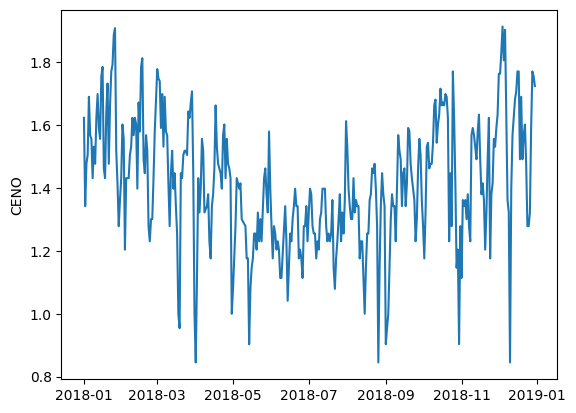

In [39]:
sns.lineplot(df_with_stations_as_cols[stazione])

array([[<AxesSubplot: title={'center': '2018-02-28'}>,
        <AxesSubplot: title={'center': '2018-04-09'}>,
        <AxesSubplot: title={'center': '2018-05-09'}>],
       [<AxesSubplot: title={'center': '2018-05-10'}>,
        <AxesSubplot: title={'center': '2018-05-25'}>,
        <AxesSubplot: title={'center': '2018-06-10'}>],
       [<AxesSubplot: title={'center': '2018-06-11'}>,
        <AxesSubplot: title={'center': '2018-08-14'}>,
        <AxesSubplot: title={'center': '2018-12-31'}>]], dtype=object)

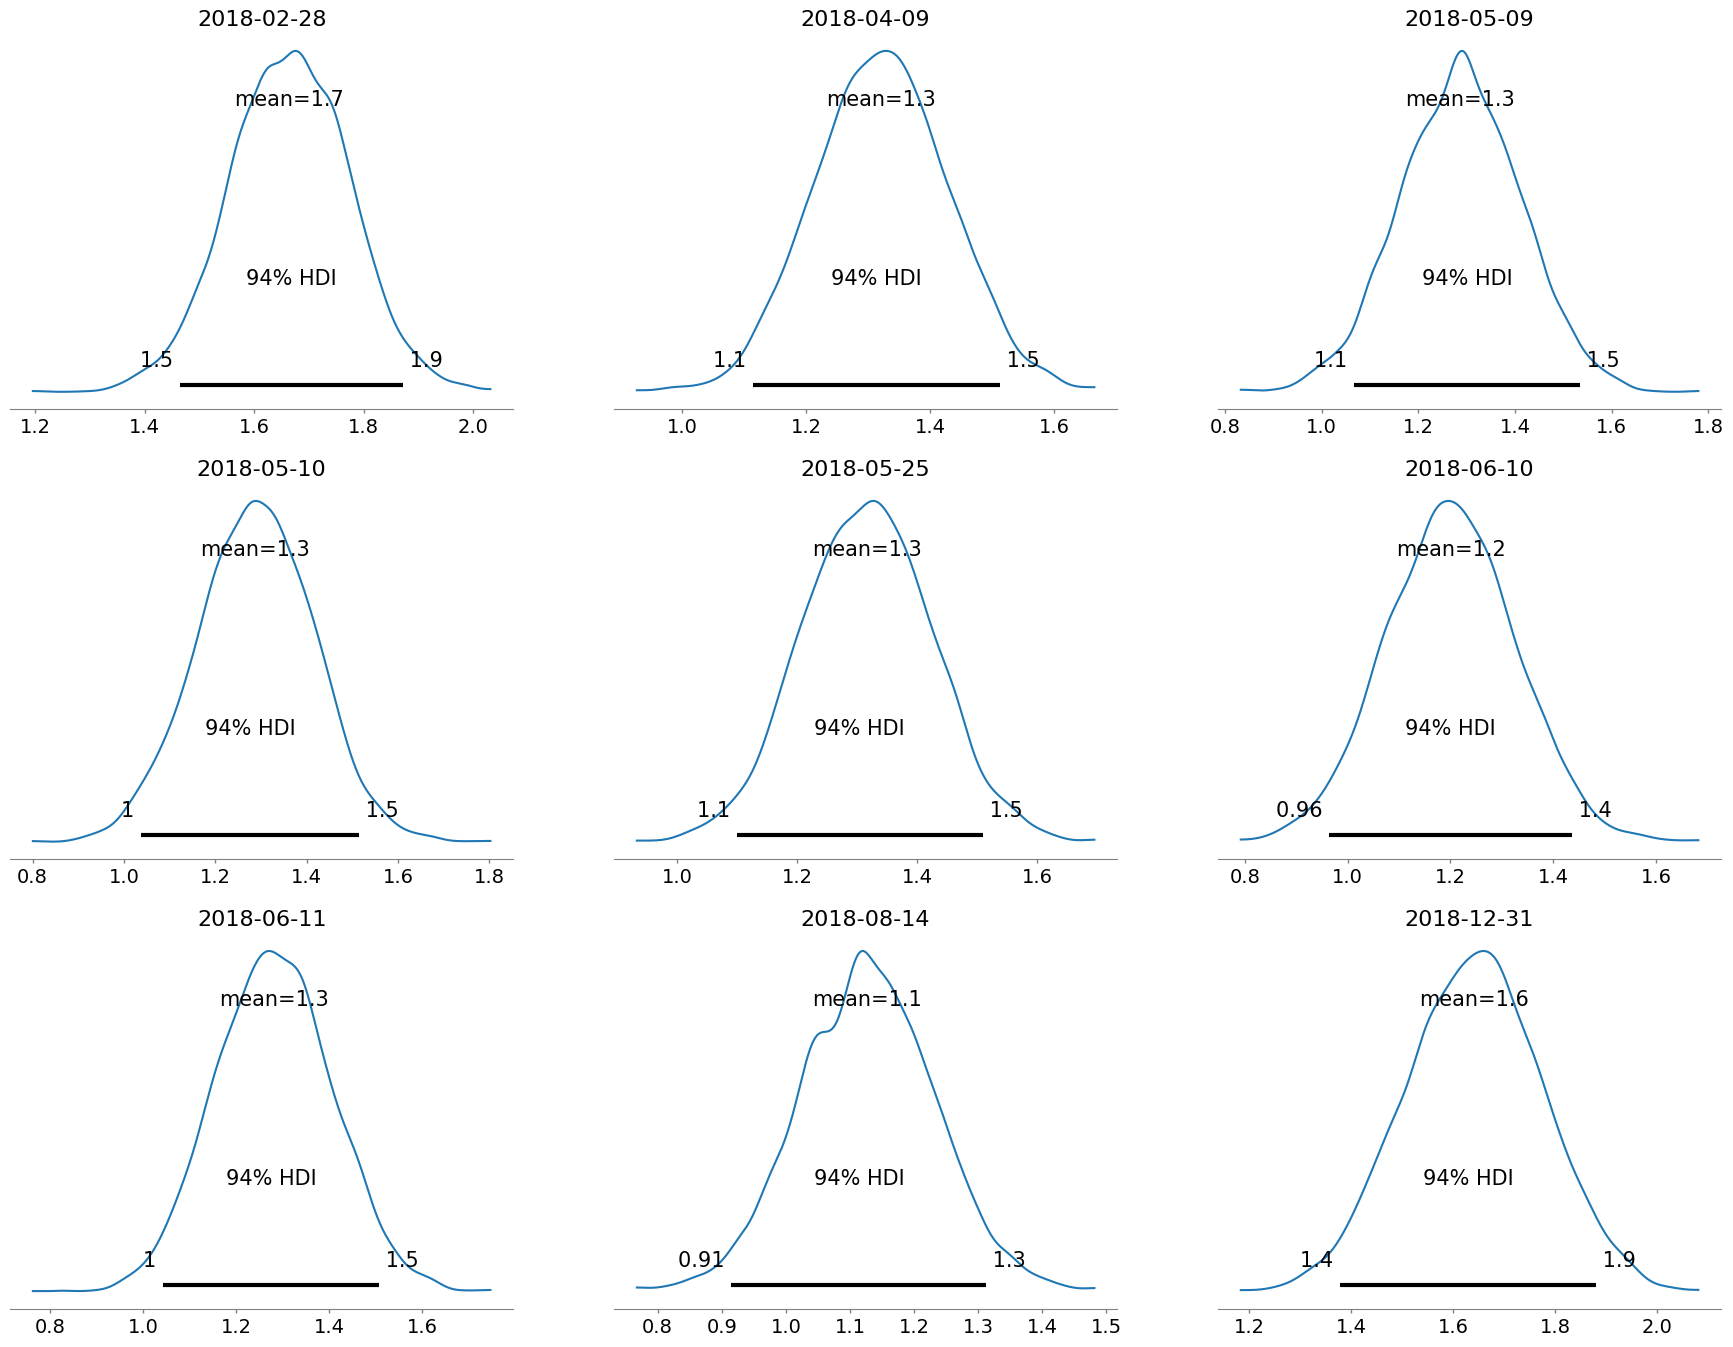

In [40]:
az.plot_posterior(y_missing_dict)